# KELOMPOK 3 - Boston House Prices

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasRegressor

np.random.seed(3)

C:\Users\ziyads059336\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Data Set

In [2]:
#load data
dataset = pd.read_csv('housing.csv',delim_whitespace=True,header=None)

In [3]:
dataset.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TARGET']

In [4]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]

## Describe Variable

In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scaling Feature

In [19]:
df = pd.DataFrame(StandardScaler().fit_transform(X),index=X.index,columns=X.columns)

In [21]:
Xdf = df.values
Xdf

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Proses Training dengan CV

In [55]:
fkfold = KFold(n_splits=10,shuffle=True,random_state=7)
lossscrtest=[]
lossscrtrain=[]

for train, test in fkfold.split(Xdf,y):
    model= Sequential()
    model.add(Dense(20, input_dim=13,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(13, kernel_initializer='uniform',activation='relu'))
    model.add(Dense(1,kernel_initializer='normal',activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(Xdf[train],y[train],epochs=150,batch_size=5,verbose=0)
    scorestest=model.evaluate(Xdf[test],y[test],verbose=0)
    scorestrain=model.evaluate(Xdf[train],y[train],verbose=0)
    lossscrtest.append(scorestest)
    lossscrtrain.append(scorestrain)
    print("%s: %.2f"%(model.metrics_names[0],scorestest))
    
print("\n%.2f (+/- %.2f)"%(np.mean(lossscrtest),np.std(lossscrtest)))

loss: 7.03
loss: 25.58
loss: 5.67
loss: 10.81
loss: 18.04
loss: 13.81
loss: 11.80
loss: 8.64
loss: 9.78
loss: 8.41

11.96 (+/- 5.65)


## Plotting Validasi vs Training

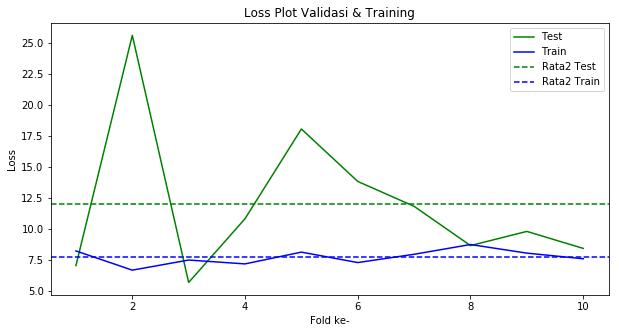

In [64]:
plt.figure(figsize=(10,5))
plt.plot(range(1, len(lossscrtest)+1),lossscrtest,color='g')
plt.plot(range(1, len(lossscrtrain)+1),lossscrtrain,color='b')
plt.axhline(np.mean(lossscrtest), color='g',ls='--')
plt.axhline(np.mean(lossscrtrain), color='b',ls='--')
plt.title('Loss Plot Validasi & Training')
plt.ylabel('Loss')
plt.xlabel('Fold ke-')
plt.legend(['Test','Train','Rata2 Test', 'Rata2 Train'])

In [ ]:
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)

In [ ]:
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
cvscores = []
models = [baseline_model, larger_model, wider_model]

for model in models:
    estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=10, verbose=0)
    scores = cross_val_score(estimator, X, y, cv=kfold)
    print('%.2f (+/- %.2f)' %(scores.mean(), scores.std()))
    cvscores.append(scores.mean())

print('\n%.2f (+/- %.2f)' %(np.mean(cvscores), np.std(cvscores)))